## HTML 형식의 데이터 처리

### XML과 HTML의 차이점
- XML
 - 태그 이름이 태그 안의 정보를 설명/태그의 제목 역할 (대표성 o)
 - 데이터/정보 저장 및 전달의 목적
- HTML
 - 태그 이름이 태그의 제목 역할 x (대표성 x)
 - 클라이언트 화면의 디자인 및 기능 제공의 목적

### HTML의 특징
- 마크업 언어: 꺾쇠로 이루어진 태그 안에 또 다른 태그가 존재하는 형태
- 단순 데이터 저장 및 전달의 목적이 아니라 화면 디자인의 목적
- 태그 이름이 디자인/기능의 역할을 하고, 대표성을 띠지 않아 크롤링이 까다로움

ex)
- <strong>strong</strong>
- <h1>h1</h1>
- <h2>h2</h2>
- <h3>h3</h3>
- <h4>h4</h4>

#### 코딩/크롤링 시 주의할 점
- 디자인/기능이 같은 항목들은 같은 태그를 사용할 것
- 같은 이름의 태그가 여러 번 반복된 경우 각 태그 안의 정보가 서로 다른 종류일 수 있음
- 태그명이 같더라도 어떤 태그에는 원하는 정보가 있고, 어떤 태그에는 원하는 정보가 없을 수 있음

### 실시간 이슈 키워드 수집
- 네이트 뉴스 검색 시 상단에 노출되는 실시간 이슈 키워드
- https://news.nate.com/search?q=abcd
- 개발자 도구(f12)를 활용하여 원하는 정보가 위치한 태그 확인

In [1]:
import requests
from bs4 import BeautifulSoup

url = 'https://news.nate.com/search?q=abcd'

response = requests.get(url).text
news_page = BeautifulSoup(response)

In [2]:
# 개발자 도구로 확인한 결과 실시간 이슈 키워드는 span -> a 태그 안에 위치

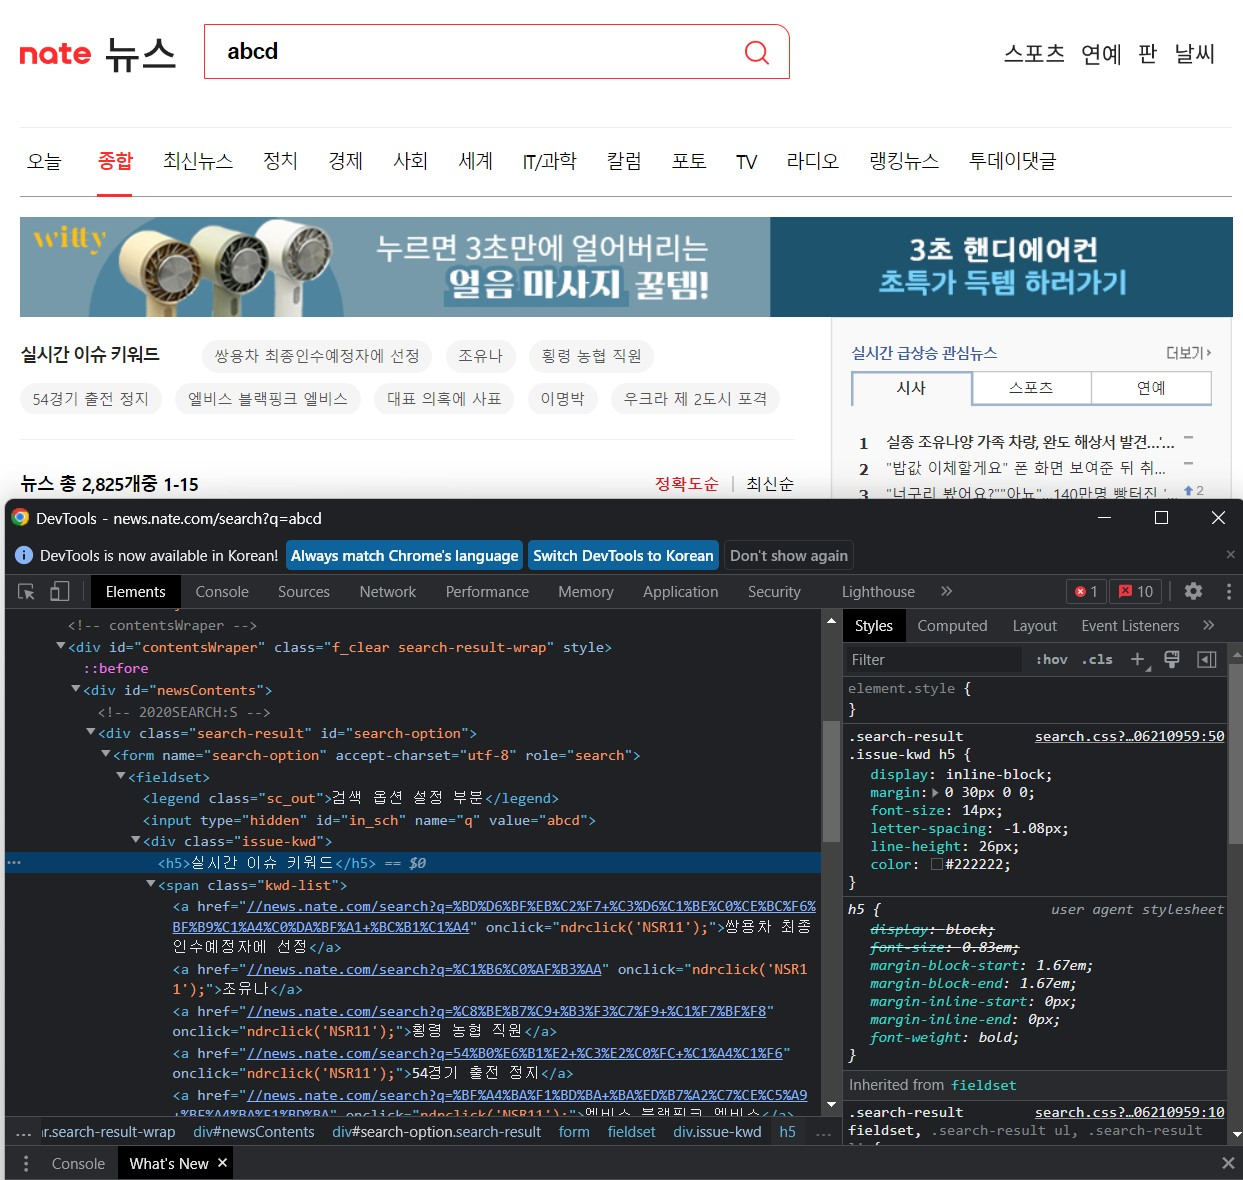

In [3]:
news_page.find('span')

<span>|</span>

In [4]:
news_page.find('a')

# span, a 이름의 태그가 너무 많아 태그 이름만으로는 원하는 정보 수집 불가능
# HTML은 XML과 달리 태그명에 대표성이 없으므로 내용이 다른 같은 태그명 무수히 많이 존재

<a class="natebi" href="//www.nate.com/?f=news" onclick="ndrclick('RIQ05');">NATE</a>

In [5]:
##### class를 이용하여 원하는 태그를 특정 #####

# 실시간 이슈 키워드가 담긴 span 태그의 class는 'kwd-list'
# dictionary 형태로 class를 지정
news_page.find('span', {'class':'kwd-list'})

# 기존 태그명만 이용하는 경우: .find('span')
# 원하는 태그를 특정해야 하는 경우: .find('span', {'class':'kwd-list'})

<span class="kwd-list">
<a href="//news.nate.com/search?q=%C1%A4%BA%CE+%E6%A8+%D9%FE%C1%A4%BA%CE" onclick="ndrclick('NSR11');">정부 與 文정부</a>
<a href="//news.nate.com/search?q=%C0%CC%BB%F3%C7%D1+%BA%AF%C8%A3%BB%E7+%BF%EC%BF%B5%BF%EC" onclick="ndrclick('NSR11');">이상한 변호사 우영우</a>
<a href="//news.nate.com/search?q=%BA%CE%BD%C7+%C1%B6%BB%E7+%B3%ED%B6%F5" onclick="ndrclick('NSR11');">부실 조사 논란</a>
<a href="//news.nate.com/search?q=%BF%A9%BE%DF+%B6%C7+%BA%D2%B9%DF" onclick="ndrclick('NSR11');">여야 또 불발</a>
<a href="//news.nate.com/search?q=%C0%CE%C7%CF%B4%EB+%BB%EC%C0%CE%C1%CB+%C0%FB%BF%EB" onclick="ndrclick('NSR11');">인하대 살인죄 적용</a>
<a href="//news.nate.com/search?q=%C0%FC%C0%DA%B4%E3%B9%E8%B6%F3+12%B9%E8" onclick="ndrclick('NSR11');">전자담배라 12배</a>
<a href="//news.nate.com/search?q=%C0%CC%B0%AD%C3%B6+%B0%A8%B5%B6+2023WBC" onclick="ndrclick('NSR11');">이강철 감독 2023WBC</a>
<a href="//news.nate.com/search?q=%BC%D2%B5%E6%BC%BC+15%B3%E2%B8%B8%BF%A1+%C1%F7%C0%E5%C0%CE" onclick="ndrclick('NSR11');">소득세 

In [6]:
##### 참고 #####

# 1) .find_next() -> 어떤 태그(노드)의 다음 태그를 반환
nt = news_page.find('span', {'class':'kwd-list'}).find_next()

# 2) string=re.compile()
import re
a_kg = news_page.find('a', string=re.compile('우영우')) # a 태그 중 '우영우'가 포함된 태그를 반환
kg = news_page.find(string=re.compile('우영우')) # '우영우'가 포함된 태그의 내용을 바로 반환

print(nt)
print(a_kg)
print(kg)

<a href="//news.nate.com/search?q=%C1%A4%BA%CE+%E6%A8+%D9%FE%C1%A4%BA%CE" onclick="ndrclick('NSR11');">정부 與 文정부</a>
<a href="//news.nate.com/search?q=%C0%CC%BB%F3%C7%D1+%BA%AF%C8%A3%BB%E7+%BF%EC%BF%B5%BF%EC" onclick="ndrclick('NSR11');">이상한 변호사 우영우</a>
이상한 변호사 우영우


In [7]:
# span 태그(class='kwd-list') 안의 a 태그를 모두 반환
kwd_area = news_page.find('span', {'class':'kwd-list'})
kwd_area.find_all('a') # find_all() -> list 형태

[<a href="//news.nate.com/search?q=%C1%A4%BA%CE+%E6%A8+%D9%FE%C1%A4%BA%CE" onclick="ndrclick('NSR11');">정부 與 文정부</a>,
 <a href="//news.nate.com/search?q=%C0%CC%BB%F3%C7%D1+%BA%AF%C8%A3%BB%E7+%BF%EC%BF%B5%BF%EC" onclick="ndrclick('NSR11');">이상한 변호사 우영우</a>,
 <a href="//news.nate.com/search?q=%BA%CE%BD%C7+%C1%B6%BB%E7+%B3%ED%B6%F5" onclick="ndrclick('NSR11');">부실 조사 논란</a>,
 <a href="//news.nate.com/search?q=%BF%A9%BE%DF+%B6%C7+%BA%D2%B9%DF" onclick="ndrclick('NSR11');">여야 또 불발</a>,
 <a href="//news.nate.com/search?q=%C0%CE%C7%CF%B4%EB+%BB%EC%C0%CE%C1%CB+%C0%FB%BF%EB" onclick="ndrclick('NSR11');">인하대 살인죄 적용</a>,
 <a href="//news.nate.com/search?q=%C0%FC%C0%DA%B4%E3%B9%E8%B6%F3+12%B9%E8" onclick="ndrclick('NSR11');">전자담배라 12배</a>,
 <a href="//news.nate.com/search?q=%C0%CC%B0%AD%C3%B6+%B0%A8%B5%B6+2023WBC" onclick="ndrclick('NSR11');">이강철 감독 2023WBC</a>,
 <a href="//news.nate.com/search?q=%BC%D2%B5%E6%BC%BC+15%B3%E2%B8%B8%BF%A1+%C1%F7%C0%E5%C0%CE" onclick="ndrclick('NSR11');">소득세 15년만에 직장인

In [8]:
kwd_area.find_all('a')[1].text

'이상한 변호사 우영우'

In [9]:
# 실시간 이슈 키워드 모두 출력
for keyword in kwd_area.find_all('a'):
    print(keyword.text)

정부 與 文정부
이상한 변호사 우영우
부실 조사 논란
여야 또 불발
인하대 살인죄 적용
전자담배라 12배
이강철 감독 2023WBC
소득세 15년만에 직장인
황금가면
박막례 6만 구독자


In [10]:
# 실시간 이슈 키워드 list 생성
# 웹 크롤링의 목적은 출력이 아니므로 활용 가능한 list 형태로 변환

kwd_list = []

for keyword in kwd_area.find_all('a'):
    kwd_list.append(keyword.text)

kwd_list

['정부 與 文정부',
 '이상한 변호사 우영우',
 '부실 조사 논란',
 '여야 또 불발',
 '인하대 살인죄 적용',
 '전자담배라 12배',
 '이강철 감독 2023WBC',
 '소득세 15년만에 직장인',
 '황금가면',
 '박막례 6만 구독자']

In [11]:
# 실시간 이슈 키워드를 list에 저장하는 함수 생성

def top_10():
    
    url = 'https://news.nate.com/search?q=abcd'
    
    # request
    response = requests.get(url).text
    news_page = BeautifulSoup(response)
    
    # 실시간 키워드 정보에 접근
    kwd_area = news_page.find('span', {'class':'kwd-list'})
    
    # list 생성
    kwd_list = []
    
    for keyword in kwd_area.find_all('a'):
        kwd_list.append(keyword.text)
        
    return kwd_list

In [12]:
top_10()

['정부 與 文정부',
 '이상한 변호사 우영우',
 '부실 조사 논란',
 '여야 또 불발',
 '인하대 살인죄 적용',
 '전자담배라 12배',
 '이강철 감독 2023WBC',
 '소득세 15년만에 직장인',
 '황금가면',
 '박막례 6만 구독자']

In [13]:
import xmltodict
import pandas as pd
import time

In [14]:
# news_get(): 구글 뉴스에서 keyword 관련 기사 정보를 수집

def news_get(keyword):
    
    url = f'https://news.google.com/rss/search?q={keyword}&hl=ko&gl=KR&ceid=KR%3Ako'
    
    response = requests.get(url).text
    news_data = xmltodict.parse(response)
    
    news_list = news_data['rss']['channel']['item']
    pd.DataFrame(news_list).to_csv(keyword + '.csv', index=False, encoding='utf-8-sig')

In [15]:
# nate 실시간 이슈 키워드를 구글 뉴스에 검색한 결과 -> csv 파일로 저장

for keyword in top_10():
    time.sleep(2) # 시간 지연 매우 중요(웹 크롤링 시 반드시 사용)
    news_get(keyword)

In [16]:
woo_news = pd.read_csv('이상한 변호사 우영우.csv')
woo_news

,title,link,guid,pubDate,description,source
0,"[장래혁의 뇌교육가이드 32편] 이상한 변호사 우영우, 서번트 메세지 - 브레인미디어",https://www.brainmedia.co.kr/Insight/22881,"{'@isPermaLink': 'false', '#text': 'CBMiKmh0dH...","Thu, 21 Jul 2022 05:45:00 GMT","<a href=""https://www.brainmedia.co.kr/Insight/...","{'@url': 'https://www.brainmedia.co.kr', '#tex..."
1,'이상한 변호사 우영우' 또 일냈다…11.7% 자체 최고 경신 [N시청률] - 조선...,https://biz.chosun.com/entertainment/tv/2022/0...,"{'@isPermaLink': 'false', '#text': '1501022397'}","Wed, 20 Jul 2022 23:16:00 GMT","<ol><li><a href=""https://biz.chosun.com/entert...","{'@url': 'https://biz.chosun.com', '#text': '조..."
2,"'이상한 변호사 우영우' 박은빈, 친모 진경과 법정대결…강태오의 '직진' - 조선비즈",https://biz.chosun.com/entertainment/tv/2022/0...,"{'@isPermaLink': 'false', '#text': 'CBMiTmh0dH...","Thu, 21 Jul 2022 00:18:00 GMT","<a href=""https://biz.chosun.com/entertainment/...","{'@url': 'https://biz.chosun.com', '#text': '조..."
3,"CNN도 우영우 주목했다 “제2의 오징어 게임, 또 K드라마 돌풍” - 조선일보 -...",https://www.chosun.com/international/us/2022/0...,"{'@isPermaLink': 'false', '#text': 'CBMiTmh0dH...","Thu, 21 Jul 2022 01:54:00 GMT","<a href=""https://www.chosun.com/international/...","{'@url': 'https://www.chosun.com', '#text': 'T..."
4,"'이상한 변호사 우영우' 인기, 타투업계도 특수…고래타투 급증 - 인사이드비나",http://www.insidevina.com/news/articleView.htm...,"{'@isPermaLink': 'false', '#text': 'CBMiO2h0dH...","Thu, 21 Jul 2022 06:23:53 GMT","<a href=""http://www.insidevina.com/news/articl...","{'@url': 'http://www.insidevina.com', '#text':..."
...,...,...,...,...,...,...
71,"[단독] 강태오, '이상한 변호사 우영우' 男주인공..안방 사로잡을 '훈남' - 스타뉴스",https://star.mt.co.kr/stview.php?no=2021100613...,"{'@isPermaLink': 'false', '#text': 'CBMiN2h0dH...","Wed, 06 Oct 2021 07:00:00 GMT","<a href=""https://star.mt.co.kr/stview.php?no=2...","{'@url': 'https://star.mt.co.kr', '#text': '스타..."
72,"박은빈, '이상한 변호사 우영우' 흥행에 함박 미소 ""사랑해주셔서 감사"" - YTN...",https://star.ytn.co.kr/_sn/0117_20220705085436...,"{'@isPermaLink': 'false', '#text': 'CBMiMmh0dH...","Tue, 05 Jul 2022 07:00:00 GMT","<a href=""https://star.ytn.co.kr/_sn/0117_20220...","{'@url': 'https://star.ytn.co.kr', '#text': 'Y..."
73,"배우 강기영, '이상한 변호사 우영우' 출연 확정 - 문화뉴스",https://www.mhns.co.kr/news/articleView.html?i...,"{'@isPermaLink': 'false', '#text': 'CBMiOWh0dH...","Wed, 03 Nov 2021 07:00:00 GMT","<a href=""https://www.mhns.co.kr/news/articleVi...","{'@url': 'https://www.mhns.co.kr', '#text': '문..."
74,"강태오, '이상한 변호사 우영우' 주인공 긍정 검토 중… 박은빈과 호흡하나 - YT...",https://star.ytn.co.kr/_sn/0117_20211006152139...,"{'@isPermaLink': 'false', '#text': 'CBMiMmh0dH...","Wed, 06 Oct 2021 07:00:00 GMT","<a href=""https://star.ytn.co.kr/_sn/0117_20211...","{'@url': 'https://star.ytn.co.kr', '#text': 'Y..."


## HTML 데이터 접근 방식
- top-down: 소스 코드의 전반적인 구조를 먼저 파악한 후 하위 태그로 이동하는 정석 크롤링 방식
- bottom-up: 빠르게 원하는 데이터에 접근하기 위해 세부적인 하위 태그부터 크롤링을 시도하는 방식
- bottom-up 방식으로 원하는 정보를 얻지 못한 경우 top-down 방식을 시도하는 것이 일반적

### 책 제목 정보 수집
- 알라딘 베스트셀러: https://www.aladin.co.kr/shop/common/wbest.aspx?BranchType=1

#### bottom-up
- 전반적인 구조 파악 이전에 원하는 정보가 담긴 세부적인 태그부터 바로 접근 시도
- 원하는 나무를 찾기 위해 나무를 하나 하나 살펴보면서 숲을 이루는 방식
- 운이 좋으면 빠른 속도로 데이터에 접근 가능하지만, 그렇지 않으면 원하는 조건에 접근하지 못할 수도 있음

In [17]:
url = 'https://www.aladin.co.kr/shop/common/wbest.aspx?BranchType=1'

response = requests.get(url).text
aladin = BeautifulSoup(response)

# 책 제목은 div(class='ss_book_box') -> ... -> b 태그 안에 존재
# botton-up 방식은 제일 하위의 b 태그부터 바로 접근 시도
aladin.find('b')

# 책 제목이 출력되면 성공, but '에세이' 출력된 것 확인

<b>에세이</b>

In [20]:
# 전체 b 태그 확인 -> 패턴이 존재한다면 쉽게 크롤링 가능
aladin.find_all('b')[:30]

# 책 제목들 간에 등간격(두 칸)의 패턴 존재
# bottom-up 방식의 장점: 정보들 간에 패턴이 존재한다면 간단히 해결 가능

[<b>에세이</b>,
 <b>인문학</b>,
 <b>헤어질 결심 각본</b>,
 <b><span class="">13,500</span>원</b>,
 <b> 409,820</b>,
 <b>알싸한 기린의 세계</b>,
 <b><span class="">16,200</span>원</b>,
 <b> 19,675</b>,
 <b>파친코 1</b>,
 <b><span class="">14,220</span>원</b>,
 <b> 84,870</b>,
 <b>유럽 도시 기행 2</b>,
 <b><span class="">15,750</span>원</b>,
 <b> 97,670</b>,
 <b>믿음에 대하여</b>,
 <b><span class="">13,050</span>원</b>,
 <b> 48,430</b>,
 <b>역행자</b>,
 <b><span class="">15,750</span>원</b>,
 <b> 144,155</b>,
 <b>원펀맨 One Punch Man 25</b>,
 <b><span class="">4,950</span>원</b>,
 <b> 49,140</b>,
 <b>불편한 편의점 (40만부 기념 벚꽃 에디션)</b>,
 <b><span class="">12,600</span>원</b>,
 <b> 355,168</b>,
 <b>계속 가보겠습니다</b>,
 <b><span class="">16,200</span>원</b>,
 <b> 35,620</b>,
 <b>마법천자문 53</b>]

In [21]:
# 세 칸의 간격을 두고 b 태그 추출
aladin.find_all('b')[2::3] # 슬라이싱 구조: [start:end:step]

# HTML 데이터의 전체 구조를 살펴보지 않고 b 태그의 패턴만 확인 -> 비교적 운이 좋은 경우

[<b>헤어질 결심 각본</b>,
 <b>알싸한 기린의 세계</b>,
 <b>파친코 1</b>,
 <b>유럽 도시 기행 2</b>,
 <b>믿음에 대하여</b>,
 <b>역행자</b>,
 <b>원펀맨 One Punch Man 25</b>,
 <b>불편한 편의점 (40만부 기념 벚꽃 에디션)</b>,
 <b>계속 가보겠습니다</b>,
 <b>마법천자문 53</b>,
 <b>작별인사</b>,
 <b>이상한 과자 가게 전천당 15</b>,
 <b>물고기는 존재하지 않는다</b>,
 <b>ETS 토익 정기시험 기출문제집 1000 Vol. 3 Reading (리딩)</b>,
 <b>세상의 마지막 기차역</b>,
 <b>ETS 토익 정기시험 기출문제집 1000 Vol. 3 Listening (리스닝)</b>,
 <b>옆집 천사님 때문에 어느샌가 인간적으로 타락한 사연 5.5 (소책자 부속 특별판)</b>,
 <b>2022 큰별쌤 최태성의 별★별한국사 한국사능력검정시험 심화(1, 2, 3급) 상</b>,
 <b>2022 큰별쌤 최태성의 별★별한국사 한국사능력검정시험 심화(1, 2, 3급) 하</b>,
 <b>최재천의 공부</b>,
 <b>기분을 관리하면 인생이 관리된다</b>,
 <b>해커스 토익 기출 보카 TOEIC VOCA 단어장</b>,
 <b>아기곰의 재테크 불변의 법칙</b>,
 <b>사서함 110호의 우편물</b>,
 <b>유럽 도시 기행 1</b>,
 <b>지정학의 힘</b>,
 <b>입지 센스</b>,
 <b>밥 프록터 부의 확신</b>,
 <b>매일을 헤엄치는 법</b>,
 <b>1차원이 되고 싶어 (0차원 에디션)</b>,
 <b>튜브</b>,
 <b>친밀한 이방인</b>,
 <b>2022 큰별쌤 최태성의 별★별한국사 기출 500제 한국사능력검정시험 심화 (1.2.3급)</b>,
 <b>명탐정 코난 : 경찰학교 편 - 하</b>,
 <b>다섯번째 산</b>,
 <b>원피스 102</b>,
 <b>너무 잘하려고 애쓰지 마라</b>,
 <b>눈물 한 방울</

In [22]:
# 추출한 책 제목을 리스트에 추가

book_list = []

for book in aladin.find_all('b')[2::3]:
    book_list.append(book.text)

book_list

['헤어질 결심 각본',
 '알싸한 기린의 세계',
 '파친코 1',
 '유럽 도시 기행 2',
 '믿음에 대하여',
 '역행자',
 '원펀맨 One Punch Man 25',
 '불편한 편의점 (40만부 기념 벚꽃 에디션)',
 '계속 가보겠습니다',
 '마법천자문 53',
 '작별인사',
 '이상한 과자 가게 전천당 15',
 '물고기는 존재하지 않는다',
 'ETS 토익 정기시험 기출문제집 1000 Vol. 3 Reading (리딩)',
 '세상의 마지막 기차역',
 'ETS 토익 정기시험 기출문제집 1000 Vol. 3 Listening (리스닝)',
 '옆집 천사님 때문에 어느샌가 인간적으로 타락한 사연 5.5 (소책자 부속 특별판)',
 '2022 큰별쌤 최태성의 별★별한국사 한국사능력검정시험 심화(1, 2, 3급) 상',
 '2022 큰별쌤 최태성의 별★별한국사 한국사능력검정시험 심화(1, 2, 3급) 하',
 '최재천의 공부',
 '기분을 관리하면 인생이 관리된다',
 '해커스 토익 기출 보카 TOEIC VOCA 단어장',
 '아기곰의 재테크 불변의 법칙',
 '사서함 110호의 우편물',
 '유럽 도시 기행 1',
 '지정학의 힘',
 '입지 센스',
 '밥 프록터 부의 확신',
 '매일을 헤엄치는 법',
 '1차원이 되고 싶어 (0차원 에디션)',
 '튜브',
 '친밀한 이방인',
 '2022 큰별쌤 최태성의 별★별한국사 기출 500제 한국사능력검정시험 심화 (1.2.3급)',
 '명탐정 코난 : 경찰학교 편 - 하',
 '다섯번째 산',
 '원피스 102',
 '너무 잘하려고 애쓰지 마라',
 '눈물 한 방울',
 '명탐정 코난 : 경찰학교 편 - 상',
 '꽁꽁꽁 아이스크림',
 '감정 어휘',
 '넛지 : 파이널 에디션',
 '변화하는 세계 질서',
 '한 개의 기쁨이 천 개의 슬픔을 이긴다 : 삶과 태도에 관하여',
 '사이다의 핸드메이드 드레스 레슨',
 '계속 가봅시다 남는 게 체력인데',
 '지구 끝의 온실 (여름 에디션)',
 

#### top-down
- 데이터의 전반적인 구조와 큰 그림을 먼저 이해한 뒤 상위 태그부터 차례로 접근
- 원하는 태그를 명확하게 크롤링 가능 -> top-down 방식으로 접근 불가능한 정보는 서버에서 접근 금지 설정한 것
- 나무를 보지 않고 숲을 보는 방식

In [23]:
# 책에 대한 전체 정보가 담긴 div(class='ss_book_box') 태그부터 접근

url = 'https://www.aladin.co.kr/shop/common/wbest.aspx?BranchType=1'
response = requests.get(url).text
aladin = BeautifulSoup(response)

all_books = aladin.find_all('div', {'class':'ss_book_box'})
len(all_books) # 실제로 웹사이트에서 한 페이지에 출력되는 책의 개수와 all_books 리스트의 길이 비교

50

In [24]:
all_books[0] # 첫 번째 div 태그를 열어 책 제목이 위치한 태그 확인

<div class="ss_book_box" itemid="298203316">
<table border="0" cellpadding="0" cellspacing="0" width="100%">
<tr>
<td align="left" style="padding-right:5px;" valign="top" width="25">
<table border="0" cellpadding="0" cellspacing="0" width="18">
<tr><td><div style="text-align: center;">1.</div></td></tr> <tr><td><div style="text-align: center;"><input name="chkCart.8932474753" type="checkbox"/></div></td></tr> </table>
</td>
<td align="left" valign="top" width="170">
<table border="0" cellpadding="0" cellspacing="0" width="150">
<tr><td style=""><div class="cover_area"><a href="https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=298203316"><div class="flipcover_out" style="height:210px;"><div class="flipcover_in lcover_none"><img class="front_cover i_cover" src="https://image.aladin.co.kr/product/29820/33/cover200/8932474753_1.jpg"/></div></div></a></div></td></tr>
<tr><td style="text-align: left;"><a href="https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=298203316" target="_blank"><im

In [25]:
# 책 제목이 위치한 b 태그에 접근
# 코드가 길어질 것을 고려하여 midpoint 변수 생성
midpoint = all_books[0].find('div', {'class':'ss_book_list'})
midpoint.find('a', {'class':'bo3'}).find('b').text

'헤어질 결심 각본'

In [26]:
# 동일한 방식으로 모든 책 제목 정보 출력(for문)

books = []

for book_area in all_books:
    midpoint = book_area.find('div', {'class':'ss_book_list'})
    title = midpoint.find('a', {'class':'bo3'}).find('b').text
    books.append(title)

print(books)

['헤어질 결심 각본', '알싸한 기린의 세계', '파친코 1', '유럽 도시 기행 2', '믿음에 대하여', '역행자', '원펀맨 One Punch Man 25', '불편한 편의점 (40만부 기념 벚꽃 에디션)', '계속 가보겠습니다', '마법천자문 53', '작별인사', '이상한 과자 가게 전천당 15', '물고기는 존재하지 않는다', 'ETS 토익 정기시험 기출문제집 1000 Vol. 3 Reading (리딩)', '세상의 마지막 기차역', 'ETS 토익 정기시험 기출문제집 1000 Vol. 3 Listening (리스닝)', '옆집 천사님 때문에 어느샌가 인간적으로 타락한 사연 5.5 (소책자 부속 특별판)', '2022 큰별쌤 최태성의 별★별한국사 한국사능력검정시험 심화(1, 2, 3급) 상', '2022 큰별쌤 최태성의 별★별한국사 한국사능력검정시험 심화(1, 2, 3급) 하', '최재천의 공부', '기분을 관리하면 인생이 관리된다', '해커스 토익 기출 보카 TOEIC VOCA 단어장', '아기곰의 재테크 불변의 법칙', '사서함 110호의 우편물', '유럽 도시 기행 1', '지정학의 힘', '입지 센스', '밥 프록터 부의 확신', '매일을 헤엄치는 법', '1차원이 되고 싶어 (0차원 에디션)', '튜브', '친밀한 이방인', '2022 큰별쌤 최태성의 별★별한국사 기출 500제 한국사능력검정시험 심화 (1.2.3급)', '명탐정 코난 : 경찰학교 편 - 하', '다섯번째 산', '원피스 102', '너무 잘하려고 애쓰지 마라', '눈물 한 방울', '명탐정 코난 : 경찰학교 편 - 상', '꽁꽁꽁 아이스크림', '감정 어휘', '넛지 : 파이널 에디션', '변화하는 세계 질서', '한 개의 기쁨이 천 개의 슬픔을 이긴다 : 삶과 태도에 관하여', '사이다의 핸드메이드 드레스 레슨', '계속 가봅시다 남는 게 체력인데', '지구 끝의 온실 (여름 에디션)', '다정한 것이 살아남는다', '풍요의 시대, 무엇이 가난인가', '그 비스크 돌은 사

In [27]:
# 알라딘 베스트셀러 50권의 제목을 반환하는 함수 생성

def best_sellers():
    
    url = 'https://www.aladin.co.kr/shop/common/wbest.aspx?BranchType=1'
    
    # request
    response = requests.get(url).text
    aladin = BeautifulSoup(response)
    
    # 전체 책 정보에 접근(전반적인 구조 파악)
    all_books = aladin.find_all('div', {'class':'ss_book_box'})
    
    # 책 제목 list 생성
    books = []

    for book_area in all_books:
        midpoint = book_area.find('div', {'class':'ss_book_list'})
        title = midpoint.find('a', {'class':'bo3'}).find('b').text
        books.append(title)

    return books

In [28]:
best_sellers()

['헤어질 결심 각본',
 '알싸한 기린의 세계',
 '파친코 1',
 '유럽 도시 기행 2',
 '믿음에 대하여',
 '역행자',
 '원펀맨 One Punch Man 25',
 '불편한 편의점 (40만부 기념 벚꽃 에디션)',
 '계속 가보겠습니다',
 '마법천자문 53',
 '작별인사',
 '이상한 과자 가게 전천당 15',
 '물고기는 존재하지 않는다',
 'ETS 토익 정기시험 기출문제집 1000 Vol. 3 Reading (리딩)',
 '세상의 마지막 기차역',
 'ETS 토익 정기시험 기출문제집 1000 Vol. 3 Listening (리스닝)',
 '옆집 천사님 때문에 어느샌가 인간적으로 타락한 사연 5.5 (소책자 부속 특별판)',
 '2022 큰별쌤 최태성의 별★별한국사 한국사능력검정시험 심화(1, 2, 3급) 상',
 '2022 큰별쌤 최태성의 별★별한국사 한국사능력검정시험 심화(1, 2, 3급) 하',
 '최재천의 공부',
 '기분을 관리하면 인생이 관리된다',
 '해커스 토익 기출 보카 TOEIC VOCA 단어장',
 '아기곰의 재테크 불변의 법칙',
 '사서함 110호의 우편물',
 '유럽 도시 기행 1',
 '지정학의 힘',
 '입지 센스',
 '밥 프록터 부의 확신',
 '매일을 헤엄치는 법',
 '1차원이 되고 싶어 (0차원 에디션)',
 '튜브',
 '친밀한 이방인',
 '2022 큰별쌤 최태성의 별★별한국사 기출 500제 한국사능력검정시험 심화 (1.2.3급)',
 '명탐정 코난 : 경찰학교 편 - 하',
 '다섯번째 산',
 '원피스 102',
 '너무 잘하려고 애쓰지 마라',
 '눈물 한 방울',
 '명탐정 코난 : 경찰학교 편 - 상',
 '꽁꽁꽁 아이스크림',
 '감정 어휘',
 '넛지 : 파이널 에디션',
 '변화하는 세계 질서',
 '한 개의 기쁨이 천 개의 슬픔을 이긴다 : 삶과 태도에 관하여',
 '사이다의 핸드메이드 드레스 레슨',
 '계속 가봅시다 남는 게 체력인데',
 '지구 끝의 온실 (여름 에디션)',
 

### select
- find_all()과 유사한 역할을 하는 함수
- find()에 비해 데이터에 접근하기 편리하여 실무자들이 주로 사용
- select()로 접근이 안되는 경우가 종종 있으므로 find()와 select() 모두 잘 알고 있는 것이 중요

In [29]:
url = 'https://www.aladin.co.kr/shop/common/wbest.aspx?BranchType=1'

response = requests.get(url).text
aladin = BeautifulSoup(response)

aladin.select('.bo3') # class가 bo3인 태그 검색(class 지칭: .)

[<a class="bo3" href="https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=298203316"><b>헤어질 결심 각본</b></a>,
 <a class="bo3" href="https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=295683968"><b>알싸한 기린의 세계</b></a>,
 <a class="bo3" href="https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=294963999"><b>파친코 1</b></a>,
 <a class="bo3" href="https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=296896486"><b>유럽 도시 기행 2</b></a>,
 <a class="bo3" href="https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=298087324"><b>믿음에 대하여</b></a>,
 <a class="bo3" href="https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=295216341"><b>역행자</b></a>,
 <a class="bo3" href="https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=298250935"><b>원펀맨 One Punch Man 25</b></a>,
 <a class="bo3" href="https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=290457417"><b>불편한 편의점 (40만부 기념 벚꽃 에디션)</b></a>,
 <a class="bo3" href="https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=297926520"><b>계속 가보겠습니다</b></a>,
 <a class="bo3" href="https://

In [30]:
aladin.select('div.ss_book_list')[:3] # class가 ss_book_list인 div 태그 검색

# find() 사용할 경우 -> aladin.find('div', {'class':'ss_book_list'})

[<div class="ss_book_list"><ul>
 <li><span class="ss_ht1">[스틸컷 엽서 세트]</span><br/></li><li><span style="font-size: 14px;">[국내도서]</span> <a class="bo3" href="https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=298203316"><b>헤어질 결심 각본</b></a> </li>
 <li><a href="/Search/wSearchResult.aspx?AuthorSearch=박찬욱@151230&amp;BranchType=1">박찬욱</a>, <a href="/Search/wSearchResult.aspx?AuthorSearch=정서경@212141&amp;BranchType=1">정서경</a> (지은이) | <a href="/search/wsearchresult.aspx?PublisherSearch=%ec%9d%84%ec%9c%a0%eb%ac%b8%ed%99%94%ec%82%ac@4340&amp;BranchType=1">을유문화사</a> | 2022년 8월</li><li><span class="">15,000</span>원 → <span class="ss_p2"><b><span class="">13,500</span>원</b></span> (<span class="ss_p">10%</span>할인),  마일리지 <span class="ss_p">750</span>원 (<span class="ss_p">5%</span> 적립)</li><li><img border="0" src="//image.aladin.co.kr/img/common/star_s10.gif" style="vertical-align: middle;"/> (<a href="https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=298203316#8932474753_CommentReview">112</a>) | 

In [31]:
aladin.select('div.ss_book_list a.bo3 b') # 공백 문자로 태그 내부 진입

[<b>헤어질 결심 각본</b>,
 <b>알싸한 기린의 세계</b>,
 <b>파친코 1</b>,
 <b>유럽 도시 기행 2</b>,
 <b>믿음에 대하여</b>,
 <b>역행자</b>,
 <b>원펀맨 One Punch Man 25</b>,
 <b>불편한 편의점 (40만부 기념 벚꽃 에디션)</b>,
 <b>계속 가보겠습니다</b>,
 <b>마법천자문 53</b>,
 <b>작별인사</b>,
 <b>이상한 과자 가게 전천당 15</b>,
 <b>물고기는 존재하지 않는다</b>,
 <b>ETS 토익 정기시험 기출문제집 1000 Vol. 3 Reading (리딩)</b>,
 <b>세상의 마지막 기차역</b>,
 <b>ETS 토익 정기시험 기출문제집 1000 Vol. 3 Listening (리스닝)</b>,
 <b>옆집 천사님 때문에 어느샌가 인간적으로 타락한 사연 5.5 (소책자 부속 특별판)</b>,
 <b>2022 큰별쌤 최태성의 별★별한국사 한국사능력검정시험 심화(1, 2, 3급) 상</b>,
 <b>2022 큰별쌤 최태성의 별★별한국사 한국사능력검정시험 심화(1, 2, 3급) 하</b>,
 <b>최재천의 공부</b>,
 <b>기분을 관리하면 인생이 관리된다</b>,
 <b>해커스 토익 기출 보카 TOEIC VOCA 단어장</b>,
 <b>아기곰의 재테크 불변의 법칙</b>,
 <b>사서함 110호의 우편물</b>,
 <b>유럽 도시 기행 1</b>,
 <b>지정학의 힘</b>,
 <b>입지 센스</b>,
 <b>밥 프록터 부의 확신</b>,
 <b>매일을 헤엄치는 법</b>,
 <b>1차원이 되고 싶어 (0차원 에디션)</b>,
 <b>튜브</b>,
 <b>친밀한 이방인</b>,
 <b>2022 큰별쌤 최태성의 별★별한국사 기출 500제 한국사능력검정시험 심화 (1.2.3급)</b>,
 <b>명탐정 코난 : 경찰학교 편 - 하</b>,
 <b>다섯번째 산</b>,
 <b>원피스 102</b>,
 <b>너무 잘하려고 애쓰지 마라</b>,
 <b>눈물 한 방울</

In [ ]:
aladin.select('div#newbg_body') # id가 newbg_body인 태그 검색(id 지칭: #)

In [39]:
aladin.select('link + style') # link 태그 바로 다음에 위치한 style 태그 검색

[<style type="text/css">
     body {
 	    margin-left: 0px;
 	    margin-top: 0px;
 	    margin-right: 0px;
 	    margin-bottom: 0px;
     }
     #global_set2_3 {float:left;text-align:center; }
     #global_set2_3 ul {}
     #global_set2_3 li { float:left;margin:0;padding:0;display:inline;list-style:none;font-size:0;height:28px;}
     #global_set2_3 li.set2se {width:1px; background:url(//image.aladin.co.kr/img/header/2011/global_set1_se.gif) right;}
 
     #re_topmenu_wrap {background:url(//image.aladin.co.kr/img/header/2011/header_menu_bg_new.gif) repeat-x; height:31px;}
     /*검색-키보드 확대시 대비한 css*/
     
     #global_search {background:url(//image.aladin.co.kr/img/header/bg_search.gif) no-repeat; width:535px; position:relative; top:28px; height:41px;}
     
     #global_search dl { float:left; width:78px; margin:12px 0 0 20px;}
     #global_search dt {background:url(//image.aladin.co.kr/img/header/i_arrdown.gif) no-repeat right 5px; color:#2f9ddc; font-weight:bold}
     #global_searc

#### >
- 직접적인 내포 관계에 있는 경우를 검색(바로 아래에 있는 경우)
- 코드에서 직접적인 내포 관계를 표현하고 싶을 때 사용
- 위에서 공백 문자로 구분한 경우는 직접적인 내포 관계가 아닌 단순 내포 관계

In [40]:
aladin.select('body > a')
# body와 a는 여러 단계에 걸친 내포 관계이므로 빈 list 반환

[]

In [41]:
aladin.select('div.ss_book_list > ul > li')[:10] # div, ul 아래의 첫 번째 li 태그에 접근(직접 내포된 li 태그의 목록)

[<li><span class="ss_ht1">[스틸컷 엽서 세트]</span><br/></li>,
 <li><span style="font-size: 14px;">[국내도서]</span> <a class="bo3" href="https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=298203316"><b>헤어질 결심 각본</b></a> </li>,
 <li><a href="/Search/wSearchResult.aspx?AuthorSearch=박찬욱@151230&amp;BranchType=1">박찬욱</a>, <a href="/Search/wSearchResult.aspx?AuthorSearch=정서경@212141&amp;BranchType=1">정서경</a> (지은이) | <a href="/search/wsearchresult.aspx?PublisherSearch=%ec%9d%84%ec%9c%a0%eb%ac%b8%ed%99%94%ec%82%ac@4340&amp;BranchType=1">을유문화사</a> | 2022년 8월</li>,
 <li><span class="">15,000</span>원 → <span class="ss_p2"><b><span class="">13,500</span>원</b></span> (<span class="ss_p">10%</span>할인),  마일리지 <span class="ss_p">750</span>원 (<span class="ss_p">5%</span> 적립)</li>,
 <li><img border="0" src="//image.aladin.co.kr/img/common/star_s10.gif" style="vertical-align: middle;"/> (<a href="https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=298203316#8932474753_CommentReview">112</a>) | 세일즈포인트 :<b> 409,820</b

In [42]:
aladin.select('div.ss_book_list > ul > li:nth-of-type(2)')[:10] # 두 번째 li 태그에 접근

[<li><span style="font-size: 14px;">[국내도서]</span> <a class="bo3" href="https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=298203316"><b>헤어질 결심 각본</b></a> </li>,
 <li><img src="//image.aladin.co.kr/img/search/icon_arrow.jpg"/>7월 19일 17시 이후 주문 고객은 7월 30일(토)에 발송됩니다. <br/> 이전 주문 고객은 29일(금)에 발송됩니다.</li>,
 <li><span style="font-size: 14px;">[국내도서]</span> <a class="bo3" href="https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=295683968"><b>알싸한 기린의 세계</b></a> </li>,
 <li><span style="font-size: 14px;">[국내도서]</span> <a class="bo3" href="https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=294963999"><b>파친코 1</b></a> </li>,
 <li><img src="//image.aladin.co.kr/img/search/icon_arrow.jpg"/>작가 사인 인쇄본</li>,
 <li><span style="font-size: 14px;">[국내도서]</span> <a class="bo3" href="https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=296896486"><b>유럽 도시 기행 2</b></a> <span style="color: #777777">ㅣ</span> <a class="ss_f_g2" href="http://www.aladin.co.kr/shop/common/wseriesitem.aspx?SRID=999906">유럽 도시 기행 2</a> <

In [45]:
for book in aladin.select('div.ss_book_list > ul > li:nth-of-type(2) > a.bo3'):
    print(book.text)

# 일부 책 누락 -> 어떤 책은 두 번째가 아닌 첫 번째 li 태그에 위치
# 아주 쉬운 해결 방법: 직접적인 내포 관계로 표현하지 않고 기존의 방식(공백 문자)으로 접근

헤어질 결심 각본
알싸한 기린의 세계
파친코 1
유럽 도시 기행 2
믿음에 대하여
역행자
불편한 편의점 (40만부 기념 벚꽃 에디션)
마법천자문 53
작별인사
이상한 과자 가게 전천당 15
물고기는 존재하지 않는다
ETS 토익 정기시험 기출문제집 1000 Vol. 3 Reading (리딩)
세상의 마지막 기차역
ETS 토익 정기시험 기출문제집 1000 Vol. 3 Listening (리스닝)
옆집 천사님 때문에 어느샌가 인간적으로 타락한 사연 5.5 (소책자 부속 특별판)
2022 큰별쌤 최태성의 별★별한국사 한국사능력검정시험 심화(1, 2, 3급) 상
최재천의 공부
기분을 관리하면 인생이 관리된다
해커스 토익 기출 보카 TOEIC VOCA 단어장
사서함 110호의 우편물
유럽 도시 기행 1
지정학의 힘
입지 센스
밥 프록터 부의 확신
매일을 헤엄치는 법
1차원이 되고 싶어 (0차원 에디션)
튜브
친밀한 이방인
다섯번째 산
원피스 102
너무 잘하려고 애쓰지 마라
눈물 한 방울
꽁꽁꽁 아이스크림
감정 어휘
넛지 : 파이널 에디션
변화하는 세계 질서
한 개의 기쁨이 천 개의 슬픔을 이긴다 : 삶과 태도에 관하여
사이다의 핸드메이드 드레스 레슨
계속 가봅시다 남는 게 체력인데
지구 끝의 온실 (여름 에디션)
다정한 것이 살아남는다
풍요의 시대, 무엇이 가난인가
그 비스크 돌은 사랑을 한다 9


In [46]:
for book in aladin.select('div.ss_book_list a.bo3 b'):
    print(book.text)

헤어질 결심 각본
알싸한 기린의 세계
파친코 1
유럽 도시 기행 2
믿음에 대하여
역행자
원펀맨 One Punch Man 25
불편한 편의점 (40만부 기념 벚꽃 에디션)
계속 가보겠습니다
마법천자문 53
작별인사
이상한 과자 가게 전천당 15
물고기는 존재하지 않는다
ETS 토익 정기시험 기출문제집 1000 Vol. 3 Reading (리딩)
세상의 마지막 기차역
ETS 토익 정기시험 기출문제집 1000 Vol. 3 Listening (리스닝)
옆집 천사님 때문에 어느샌가 인간적으로 타락한 사연 5.5 (소책자 부속 특별판)
2022 큰별쌤 최태성의 별★별한국사 한국사능력검정시험 심화(1, 2, 3급) 상
2022 큰별쌤 최태성의 별★별한국사 한국사능력검정시험 심화(1, 2, 3급) 하
최재천의 공부
기분을 관리하면 인생이 관리된다
해커스 토익 기출 보카 TOEIC VOCA 단어장
아기곰의 재테크 불변의 법칙
사서함 110호의 우편물
유럽 도시 기행 1
지정학의 힘
입지 센스
밥 프록터 부의 확신
매일을 헤엄치는 법
1차원이 되고 싶어 (0차원 에디션)
튜브
친밀한 이방인
2022 큰별쌤 최태성의 별★별한국사 기출 500제 한국사능력검정시험 심화 (1.2.3급)
명탐정 코난 : 경찰학교 편 - 하
다섯번째 산
원피스 102
너무 잘하려고 애쓰지 마라
눈물 한 방울
명탐정 코난 : 경찰학교 편 - 상
꽁꽁꽁 아이스크림
감정 어휘
넛지 : 파이널 에디션
변화하는 세계 질서
한 개의 기쁨이 천 개의 슬픔을 이긴다 : 삶과 태도에 관하여
사이다의 핸드메이드 드레스 레슨
계속 가봅시다 남는 게 체력인데
지구 끝의 온실 (여름 에디션)
다정한 것이 살아남는다
풍요의 시대, 무엇이 가난인가
그 비스크 돌은 사랑을 한다 9


### 이미지 크롤링

In [47]:
url = 'https://www.aladin.co.kr/shop/common/wbest.aspx?BranchType=1'

response = requests.get(url).text
aladin = BeautifulSoup(response)

aladin.select('div.flipcover_in lcover_none img.front_cover i_cover')

# select() 사용 시 class 이름 자체에 공백 문자가 포함된 경우 데이터에 접근 불가
# 시스템이 class명에 포함된 공백 문자와 태그를 구분하는 공백 문자를 혼동 -> find()를 사용하면 해결 가능

[]

In [48]:
aladin.find('div', {'class':'flipcover_in lcover_none'}).find('img')

<img class="front_cover i_cover" src="https://image.aladin.co.kr/product/29820/33/cover200/8932474753_1.jpg"/>

In [49]:
image = aladin.find('div', {'class':'flipcover_in lcover_none'}).find('img')
image.get('src') # get() 메소드를 통해 태그의 속성에 접근 가능

'https://image.aladin.co.kr/product/29820/33/cover200/8932474753_1.jpg'